In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import pandas as pd
import seaborn as sns
from IPython.display import display, Math, Latex

HOME_DIR = os.getcwd()

In [2]:
os.chdir(HOME_DIR)
os.chdir("../experiment_results") 
files = ['uniform_errorbars.csv']

In [3]:
df = pd.read_csv(files[0])
df = df.drop(columns=['Workload (Perturbed)', 'Workload (True)'])
combined_costs = df.groupby(['Epsilon', 'Rho Multiplier'])['Robust Cost'].apply(np.array).reset_index()
combined_costs['mean'] = combined_costs['Robust Cost'].apply(lambda x: x.mean())
combined_costs['error'] = combined_costs['Robust Cost'].apply(lambda x: x.std()/np.sqrt(len(x)))
#combined_costs.head()

In [23]:
df['Percent Change'] = (df['Robust Cost'] - df['Nominal Cost'])/df['Nominal Cost']
percent_change = df.groupby(['Epsilon', 'Rho Multiplier'])['Percent Change'].apply(np.array).reset_index()
percent_change['mean'] = percent_change['Percent Change'].apply(lambda x: x.mean())
percent_change['error'] = percent_change['Percent Change'].apply(lambda x: x.std()/np.sqrt(len(x)))
#percent_change.head()

## Error Experiment
Ran $30$ trials on the uniformly distributed workload to see the variability of results we'd get. 

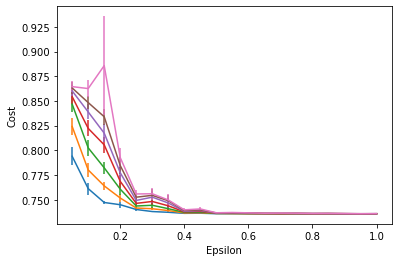

In [24]:
palette = sns.color_palette("hls", 7)
palette[3] = (0.95, 0.2, 0.34)
palette[0] = (0.0, 1.0, 0.0)
palette[2] = (1.0, 0.847, 0.659)

for mult in combined_costs['Rho Multiplier'].unique(): 
    selection = combined_costs[combined_costs['Rho Multiplier'] == mult]
    plt.errorbar(selection['Epsilon'].to_numpy(), selection['mean'].to_numpy(), yerr=selection['error'].to_numpy())
    
plt.xlabel('Epsilon')
plt.ylabel('Cost')
plt.show()

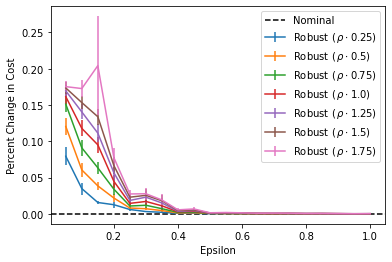

In [25]:
for mult in percent_change['Rho Multiplier'].unique(): 
    selection = percent_change[percent_change['Rho Multiplier'] == mult]
    plt.errorbar(selection['Epsilon'].to_numpy(), selection['mean'].to_numpy(), yerr=selection['error'].to_numpy(), label=rf'Robust ($\,\rho \cdot ${mult})')
    
plt.axhline(y=0, color='black', linestyle="--", label="Nominal")
plt.legend()
plt.xlabel('Epsilon')
plt.ylabel('Percent Change in Cost')
plt.show()

In [37]:
selection = df.groupby(['Epsilon', 'Rho Multiplier'])['Rho (True)'].apply(np.array).reset_index()
selection['mean'] = selection['Rho (True)'].apply(lambda x: x.mean())
selection['error'] = selection['Rho (True)'].apply(lambda x: x.std()/np.sqrt(len(x)))
selection = selection[selection['Rho Multiplier'] == 1.75]
selection[selection['Epsilon'] < 0.3]

,Epsilon,Rho Multiplier,Rho (True),mean,error
6,0.05,1.75,"[1.1778489467956048, 1.1926533437838074, 0.236...",0.488908,0.071647
13,0.10,1.75,"[0.0248903103454604, 0.1012963637657662, 0.090...",0.214783,0.040096
20,0.15,1.75,"[0.0203669846768371, 0.0026874510260184, 0.008...",0.052549,0.018820
27,0.20,1.75,"[0.0209655755790454, 0.0137074026647999, 0.012...",0.053939,0.017140
34,0.25,1.75,"[0.0087370904662626, 0.1263384215891325, 0.023...",0.033957,0.011633


Generally, the error bars are pretty small, except for one point in $\rho \cdot 1.75$ where $\varepsilon = 0.15$. Seems like the true $\rho$ is actually pretty close to the original for these trials. Maybe the larger search space contributed to the variability. 